<div align="center"><img src="../../images/LKYCIC_Header.jpg"></div>

### Use OSMnx to get street networks

In [ ]:
# Uncomment the following line to install osmnx
#!pip install osmnx

In [2]:
import osmnx as ox
import networkx as nx

ox.__version__

'2.0.1'

In [1]:
%pwd

'/mnt/c/Users/LiBayi/Documents/work/GIS-training/jupyters/extra_practices'

In this case, we will retrieve the geometry of **Singapore**.

In [22]:
import geopandas as gpd

Singapore_boundary = gpd.read_file('../../data/raw/project/Singapore_boundary_noisland.shp')

In [23]:
Singapore_boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
Singapore_boundary.to_crs(epsg=3414, inplace=True)

In [26]:
Singapore_boundary.crs

<Projected CRS: EPSG:3414>
Name: SVY21 / Singapore TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Singapore - onshore and offshore.
- bounds: (103.59, 1.13, 104.07, 1.47)
Coordinate Operation:
- name: Singapore Transverse Mercator
- method: Transverse Mercator
Datum: SVY21
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

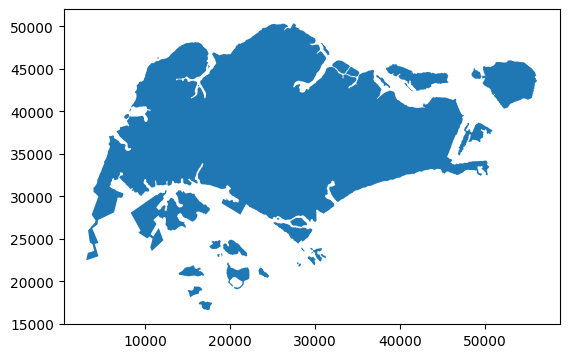

In [27]:
Singapore_boundary.plot()

<Axes: >

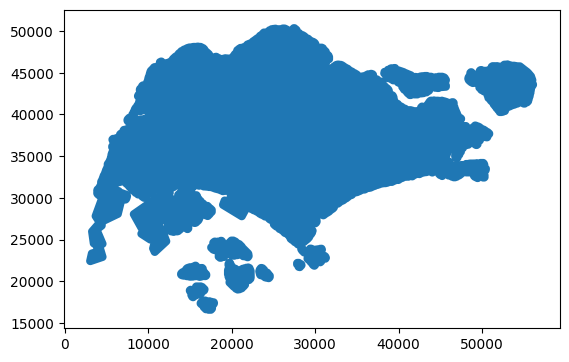

In [30]:
# buffer the boundary by 500m to include more area
buffered_boundary = gpd.GeoDataFrame(Singapore_boundary.buffer(500), columns=['geometry'], crs=Singapore_boundary.crs)

buffered_boundary.plot()

In [31]:
buffered_boundary.to_crs(epsg=4326, inplace=True)

#### Query the data using the boundary

The `graph_from_polygon` function downloads and creates a graph within the boundaries of a (Multi)Polygon.

In [42]:
G = ox.graph.graph_from_polygon(buffered_boundary.geometry[0], network_type="bike")

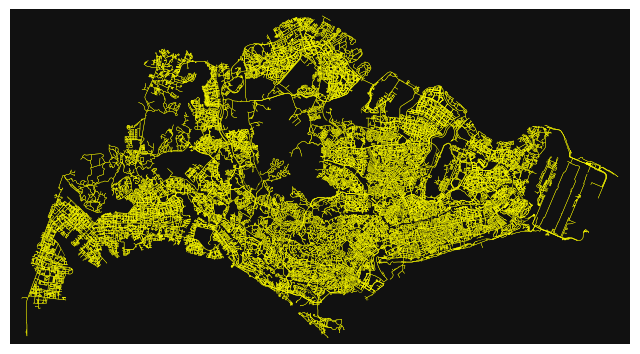

In [43]:
# We can use the plot_graph function provided by OSMnx to plot the graph
fig, ax = ox.plot.plot_graph(G, node_size=0, edge_color="yellow", edge_linewidth=0.25)

### Export the roadset to GeoJSON

Firstly, we need to use `ox.convert.graph_to_gdfs` to transform it (NetworkX graph object) to GeoDataFrame.

In [44]:
sg_road = ox.convert.graph_to_gdfs(G, nodes=False, edges=True, node_geometry=True, fill_edge_geometry=True)

In [47]:
# export the graph to disk as a shapefile
sg_road.to_file("../../data/processed/part_iii/sg_bike_road.geojson", driver="GeoJSON") # G.edges

At this time, we have acquired the road network in Singapore.